# Global YouTube Statistics

# Project by:Athashri Gangan 
# Batch Code: 8220
# Mentor: Rajshri Thete

# Introduction:
 This project focuses on analyzing YouTube data to explore the relationship between various metrics such as subscribers, video views, and uploads. By leveraging a comprehensive dataset of popular YouTube channels, the analysis aims to uncover trends and insights that can be used to optimize video content and improve audience engagement.

# Objective
The main objective of this project is to identify key factors influencing YouTube channel performance. 
This includes understanding how metrics like subscribers, video views, uploads, and earnings correlate with each other. 
The insights derived will help content creators and marketers make data-driven decisions to optimize their content strategy.

In [48]:
import mysql.connector
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
connection = mysql.connector.connect(
user='root',
password='athashri',
host='localhost',
database='Youtube' # write here database name 
)

In [50]:
# # Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [ ]:
Exploratory Data Analysis

In [51]:
conn = sqlite3.connect('youtube.db')
cursor=connection.cursor()

In [52]:
cursor.execute('select * from  YouTuber_Info ')
YouTuberInfo_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [53]:
print(YouTuberInfo_data.head())

   youtuber_rank                    Youtuber          category  \
0              1                    T-Series             Music   
1              2              YouTube Movies  Film & Animation   
2              3                     MrBeast     Entertainment   
3              4  Cocomelon - Nursery Rhymes         Education   
4              5                   SET India             Shows   

                        Title        Country   channel_type  created_year  
0                    T-Series          India  Entertainment          2006  
1               youtubemovies  United States  Entertainment          2008  
2                     MrBeast  United States      Education          2012  
3  Cocomelon - Nursery Rhymes  United States           Kids          2006  
4                   SET India          India  Entertainment          2005  


In [54]:
cursor.execute('select * from  Channel_Statistics ')
ChannelStatistics_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [55]:
print(ChannelStatistics_data.head())

   youtuber_rank  subscribers   video_views  uploads lowest_monthly_earnings  \
0              1    238000000  228000000000    19000               700000.00   
1              2    153000000    3000000000     5000               200000.00   
2              3    120000000   20000000000      730               400000.00   
3              4    152000000  155000000000      800               500000.00   
4              5    160000000  180000000000    22000               450000.00   

  highest_monthly_earnings  
0               1000000.00  
1                300000.00  
2                700000.00  
3                800000.00  
4                700000.00  


# DATA CLEANING

In [64]:
# Handle missing values
YouTuberInfo_data.dropna(inplace=True)  # Drop rows with any missing values

In [65]:
# Remove duplicates
YouTuberInfo_data.drop_duplicates(inplace=True)

In [66]:
YouTuberInfo_data.head(5)

,youtuber_rank,Youtuber,category,Title,Country,channel_type,created_year
0,1,T-Series,Music,T-Series,India,Entertainment,2006
1,2,YouTube Movies,Film & Animation,youtubemovies,United States,Entertainment,2008
2,3,MrBeast,Entertainment,MrBeast,United States,Education,2012
3,4,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,Kids,2006
4,5,SET India,Shows,SET India,India,Entertainment,2005


In [67]:
# Handle missing values
ChannelStatistics_data.dropna(inplace=True)  # Drop rows with any missing values

In [68]:
# Remove duplicates
ChannelStatistics_data.drop_duplicates(inplace=True)

In [69]:
ChannelStatistics_data.head(5)

,youtuber_rank,subscribers,video_views,uploads,lowest_monthly_earnings,highest_monthly_earnings
0,1,238000000,228000000000,19000,700000.00,1000000.00
1,2,153000000,3000000000,5000,200000.00,300000.00
2,3,120000000,20000000000,730,400000.00,700000.00
3,4,152000000,155000000000,800,500000.00,800000.00
4,5,160000000,180000000000,22000,450000.00,700000.00


In [56]:
YouTuberInfo_data.describe()

,youtuber_rank,created_year
count,50.00000,50.000000
mean,25.50000,2010.820000
std,14.57738,3.972816
min,1.00000,2005.000000
25%,13.25000,2007.000000
50%,25.50000,2012.000000
75%,37.75000,2014.000000
max,50.00000,2018.000000


In [57]:
print(YouTuberInfo_data.columns)

Index(['youtuber_rank', 'Youtuber', 'category', 'Title', 'Country',
       'channel_type', 'created_year'],
      dtype='object')


In [58]:
ChannelStatistics_data.describe()

,youtuber_rank,subscribers,video_views,uploads
count,50.00000,5.000000e+01,5.000000e+01,50.000000
mean,25.50000,6.900000e+07,5.244000e+10,6852.600000
std,14.57738,4.028774e+07,4.064187e+10,11247.173397
min,1.00000,3.100000e+07,3.000000e+09,250.000000
25%,13.25000,4.325000e+07,3.700000e+10,800.000000
50%,25.50000,5.550000e+07,4.100000e+10,2600.000000
75%,37.75000,8.325000e+07,5.175000e+10,7000.000000
max,50.00000,2.380000e+08,2.280000e+11,62000.000000


In [59]:
print(ChannelStatistics_data.columns)

Index(['youtuber_rank', 'subscribers', 'video_views', 'uploads',
       'lowest_monthly_earnings', 'highest_monthly_earnings'],
      dtype='object')


# Merging all the columns using foreign key

In [60]:
query = """
SELECT 
    YouTuber_Info.youtuber_rank,
    YouTuber_Info.Youtuber,
    YouTuber_Info.category,
    YouTuber_Info.Title,
    YouTuber_Info.Country,
    YouTuber_Info.channel_type,
    YouTuber_Info.created_year,
    Channel_Statistics.subscribers,
    Channel_Statistics.video_views,
    Channel_Statistics.uploads,
    Channel_Statistics.lowest_monthly_earnings,
    Channel_Statistics.highest_monthly_earnings
FROM 
    YouTuber_Info
INNER JOIN 
    Channel_Statistics 
ON 
    YouTuber_Info.youtuber_rank = Channel_Statistics.youtuber_rank;
""" 

In [61]:
cursor.execute(query)

In [62]:
results = cursor.fetchall()

In [63]:
if results:
    # Print the column headers
    headers = [
        "Youtuber Rank", "Youtuber", "Category", "Title", 
        "Country", "Channel Type", "Created Year", 
        "Subscribers", "Video Views", "Uploads", 
        "Lowest Monthly Earnings", "Highest Monthly Earnings"
    ]
    print(headers)
    for row in results:
        print(row)
else:
    print("No results found.")

['Youtuber Rank', 'Youtuber', 'Category', 'Title', 'Country', 'Channel Type', 'Created Year', 'Subscribers', 'Video Views', 'Uploads', 'Lowest Monthly Earnings', 'Highest Monthly Earnings']
(1, 'T-Series', 'Music', 'T-Series', 'India', 'Entertainment', 2006, 238000000, 228000000000, 19000, Decimal('700000.00'), Decimal('1000000.00'))
(2, 'YouTube Movies', 'Film & Animation', 'youtubemovies', 'United States', 'Entertainment', 2008, 153000000, 3000000000, 5000, Decimal('200000.00'), Decimal('300000.00'))
(3, 'MrBeast', 'Entertainment', 'MrBeast', 'United States', 'Education', 2012, 120000000, 20000000000, 730, Decimal('400000.00'), Decimal('700000.00'))
(4, 'Cocomelon - Nursery Rhymes', 'Education', 'Cocomelon - Nursery Rhymes', 'United States', 'Kids', 2006, 152000000, 155000000000, 800, Decimal('500000.00'), Decimal('800000.00'))
(5, 'SET India', 'Shows', 'SET India', 'India', 'Entertainment', 2005, 160000000, 180000000000, 22000, Decimal('450000.00'), Decimal('700000.00'))
(6, 'PewDie

In [95]:
print(merged_data.columns)


Index(['youtuber_rank', 'Youtuber', 'category', 'Title', 'Country',
       'channel_type', 'created_year', 'subscribers', 'video_views', 'uploads',
       'lowest_monthly_earnings', 'highest_monthly_earnings'],
      dtype='object')


# Data Visualization

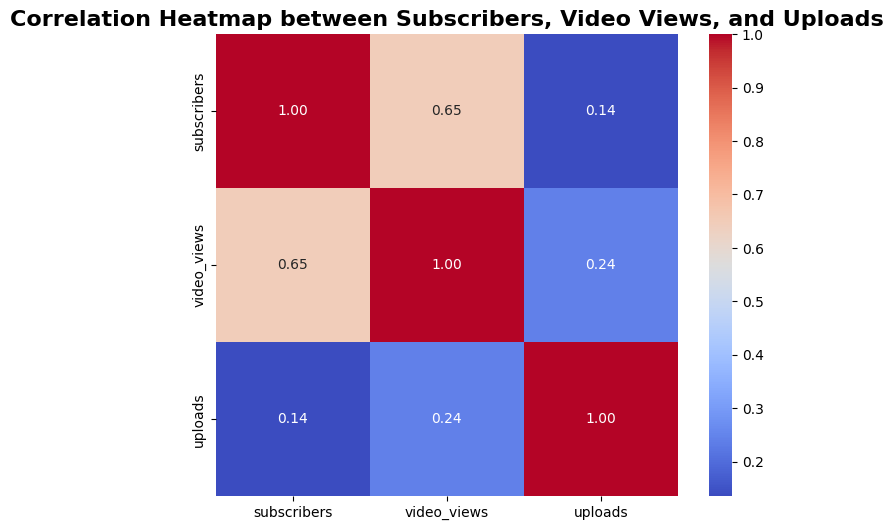

In [71]:
merged_data = pd.merge(YouTuberInfo_data, ChannelStatistics_data, on='youtuber_rank')

# Calculate the correlation matrix
correlation_matrix = merged_data[['subscribers', 'video_views', 'uploads']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Correlation Heatmap between Subscribers, Video Views, and Uploads', weight='bold', fontsize=16)

# Display the heatmap
plt.show()

# Correlation Heatmap (Subscribers, Video Views, Uploads)
Insight: The heatmap shows a moderate correlation between subscribers and video views, indicating that as the number of subscribers increases, 
the number of video views also tends to increase. However, the correlation between uploads and both subscribers and video views is weaker, 
suggesting that the number of uploads alone doesn’t significantly drive higher engagement or viewership.


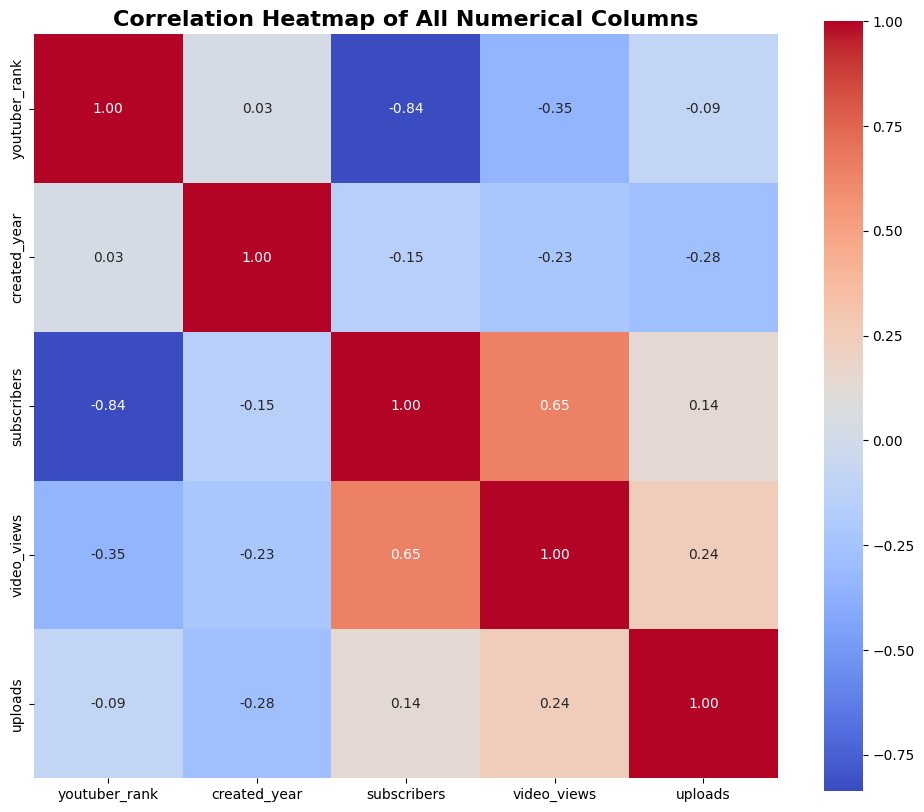

In [73]:
# Merge the two DataFrames on 'youtuber_rank'
merged_data = pd.merge(YouTuberInfo_data, ChannelStatistics_data, on='youtuber_rank')

# Select only the numerical columns for correlation
numerical_cols = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Set the title
plt.title('Correlation Heatmap of All Numerical Columns', weight='bold', fontsize=16)

# Display the heatmap
plt.show()

In [ ]:
#Correlation Heatmap
Rank and subscribers are strongly negatively correlated: more subscribers lead to better ranks.
Subscribers and video views have a positive relationship: more subscribers generally mean more views.
Uploads have a weak correlation with both subscribers and views: more uploads don’t significantly boost either.
Year created has little influence on rank, subscribers, or views.
Subscribers are the key driver of success, while uploads and the year of creation play a smaller role.

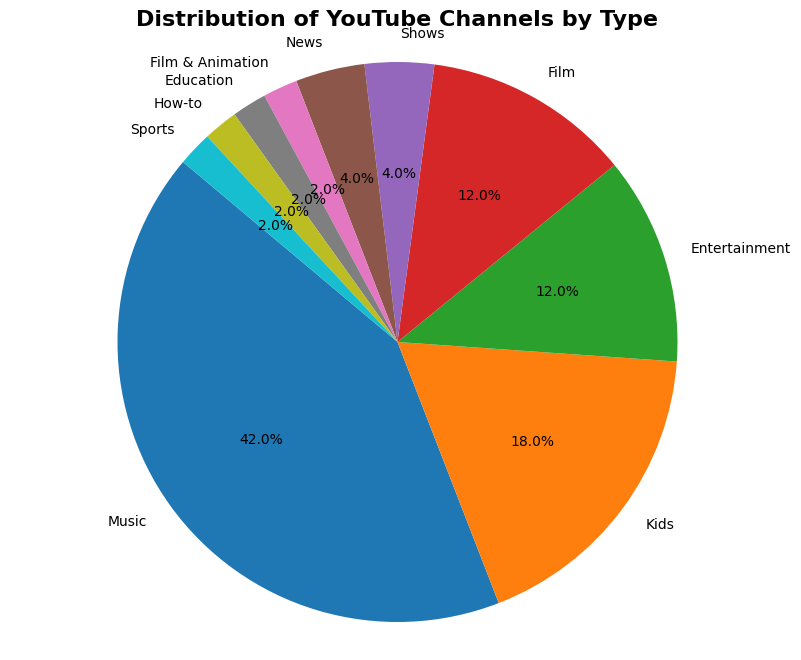

In [75]:
# Count the occurrences of each category from the YoutubeInfo_data DataFrame
category_counts = YouTuberInfo_data['category'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Set the title
plt.title('Distribution of YouTube Channels by Type', weight='bold', fontsize=16)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

# Pie Chart: Distribution of YouTube Channels by Type
Insight: The pie chart reveals that Music channels dominate YouTube, representing 42% of the total. Other key segments include Kids channels (18%), 
Entertainment (12%), and Film (12%). Smaller categories, such as Sports, How-to, and Education, account for minor percentages (around 2-4%). 
This distribution highlights the significant presence of entertainment and music-focused content on the platform.

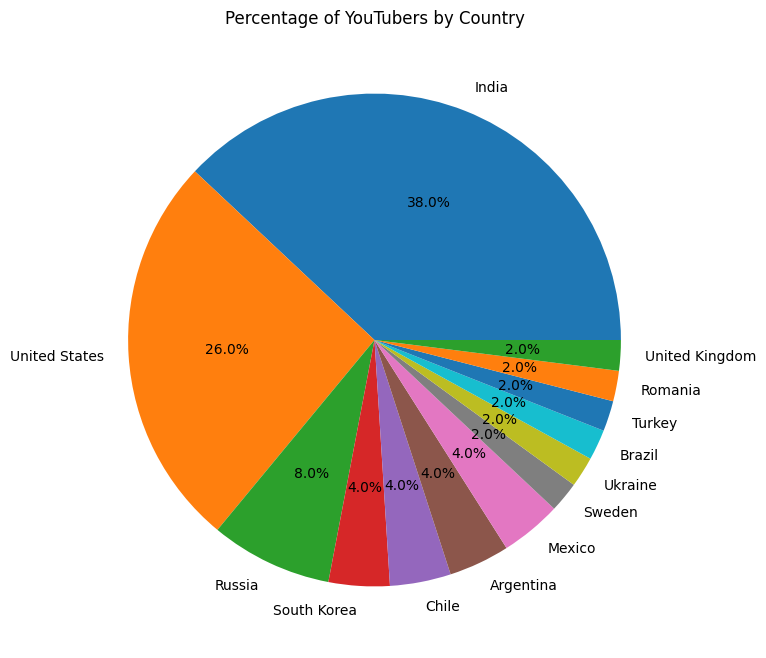

In [77]:
#Percentage of YouTubers by Country
country_counts = YouTuberInfo_data['Country'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Percentage of YouTubers by Country')
plt.show()



# Pie Chart: Percentage of YouTubers by Country
Insight: The largest percentage of YouTubers comes from India (38%), followed by the United States (26%). Russia accounts for 8%, while South Korea, 
Chile, and Argentina represent smaller shares at around 4% each. This chart illustrates the global dominance of India and the United States in content
creation on YouTube.

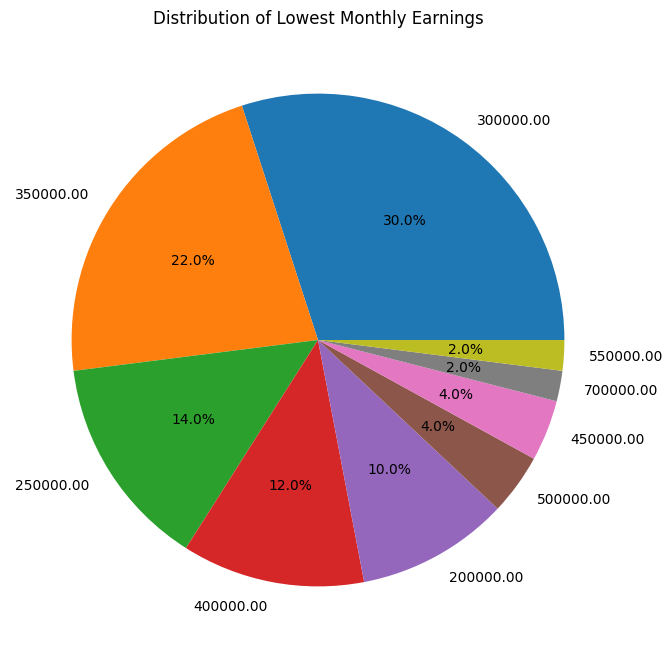

In [79]:
#Distribution of Lowest Monthly Earnings

lowest_earnings_counts = ChannelStatistics_data['lowest_monthly_earnings'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(lowest_earnings_counts, labels=lowest_earnings_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Lowest Monthly Earnings')
plt.show()


# Pie Chart: Distribution of Lowest Monthly Earnings
Insight: The majority of YouTube channels (30%) fall within the $300,000 earnings range. Other significant groups include those earning around $350,000
(22%) and $250,000 (14%). This shows that most top-performing channels have earnings clustered around the mid-range, with a notable concentration in the
$300,000-$400,000 range.

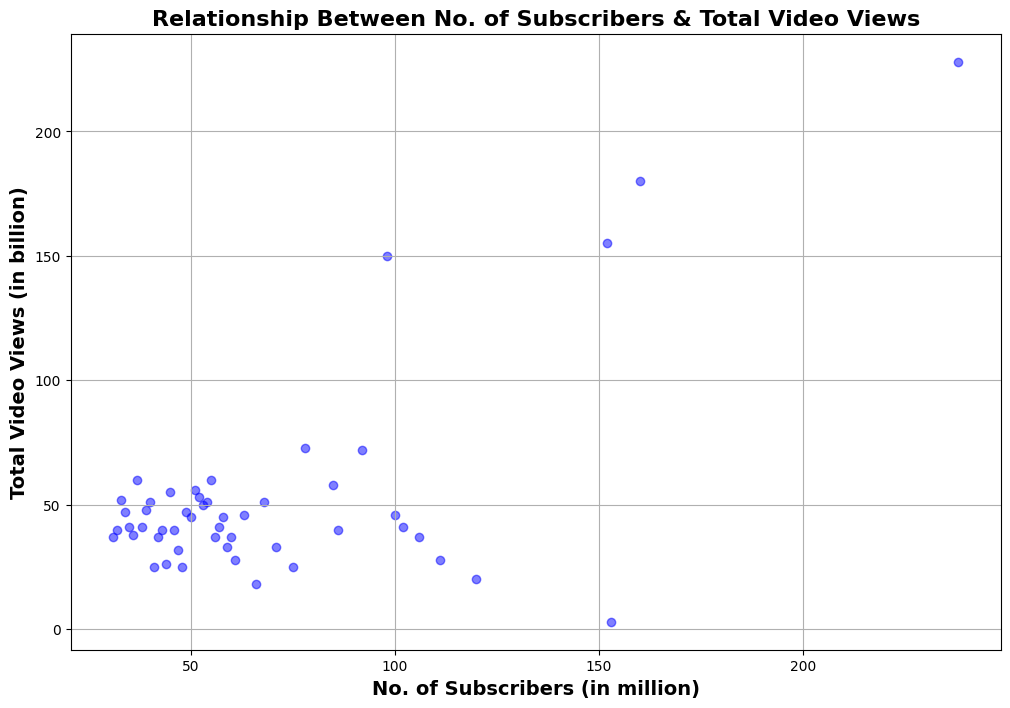

In [81]:
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['subscribers'] / 1_000_000, merged_data['video_views'] / 1_000_000_000, 
            alpha=0.5, color='blue')

# Set the labels and title
plt.title('Relationship Between No. of Subscribers & Total Video Views', weight='bold', fontsize=16)
plt.xlabel('No. of Subscribers (in million)', weight='bold', fontsize=14)
plt.ylabel('Total Video Views (in billion)', weight='bold', fontsize=14)

# Show the grid
plt.grid(True)

# Display the plot
plt.show()

# Scatter Plot: Relationship Between Subscribers and Total Video Views
Insight: The scatter plot shows a positive relationship between the number of subscribers and total video views. Most channels have fewer than 
100 million subscribers and 50 billion views. However, as the number of subscribers increases beyond 100 million, the correlation becomes less 
consistent, indicating that more subscribers do not always translate into proportionally higher video views.

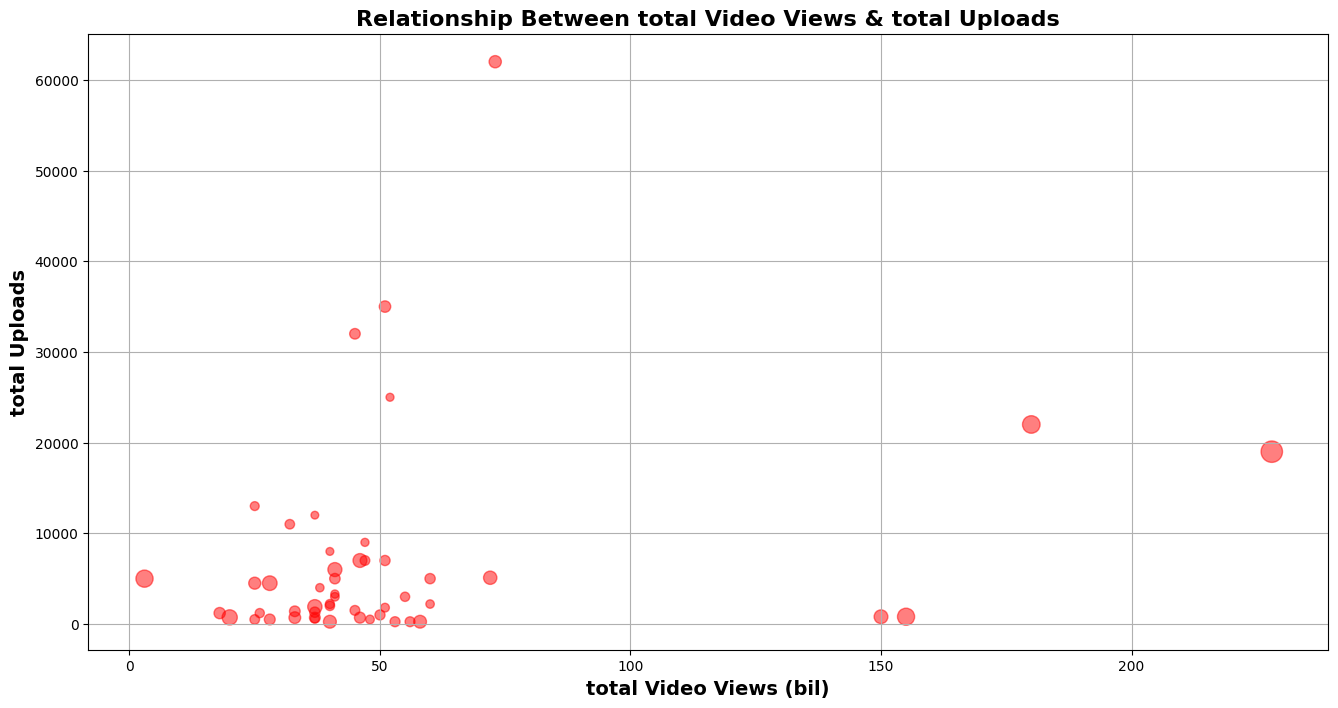

In [83]:
plt.figure(figsize=(16, 8))

# Plot scatter plot with bubble sizes and color
plt.scatter(merged_data['video_views'] / 1_000_000_000, merged_data['uploads'],
            s=merged_data['subscribers'] / 1_000_000, alpha=0.5, color='red')

# Set the labels and title
plt.title('Relationship Between total Video Views & total Uploads', weight='bold', fontsize=16)
plt.xlabel('total Video Views (bil)', weight='bold', fontsize=14)
plt.ylabel('total Uploads', weight='bold', fontsize=14)

# Show the grid and plot
plt.grid(True)
plt.show()


# Scatter Plot: Relationship Between Total Video Views and Total Uploads
Insight: The plot reveals a general trend where more video views lead to higher uploads. However, there is significant variability, 
meaning that some channels with fewer uploads can still achieve high video views. This indicates that factors beyond just the number of uploads, 
such as content quality and audience engagement, also play a critical role.

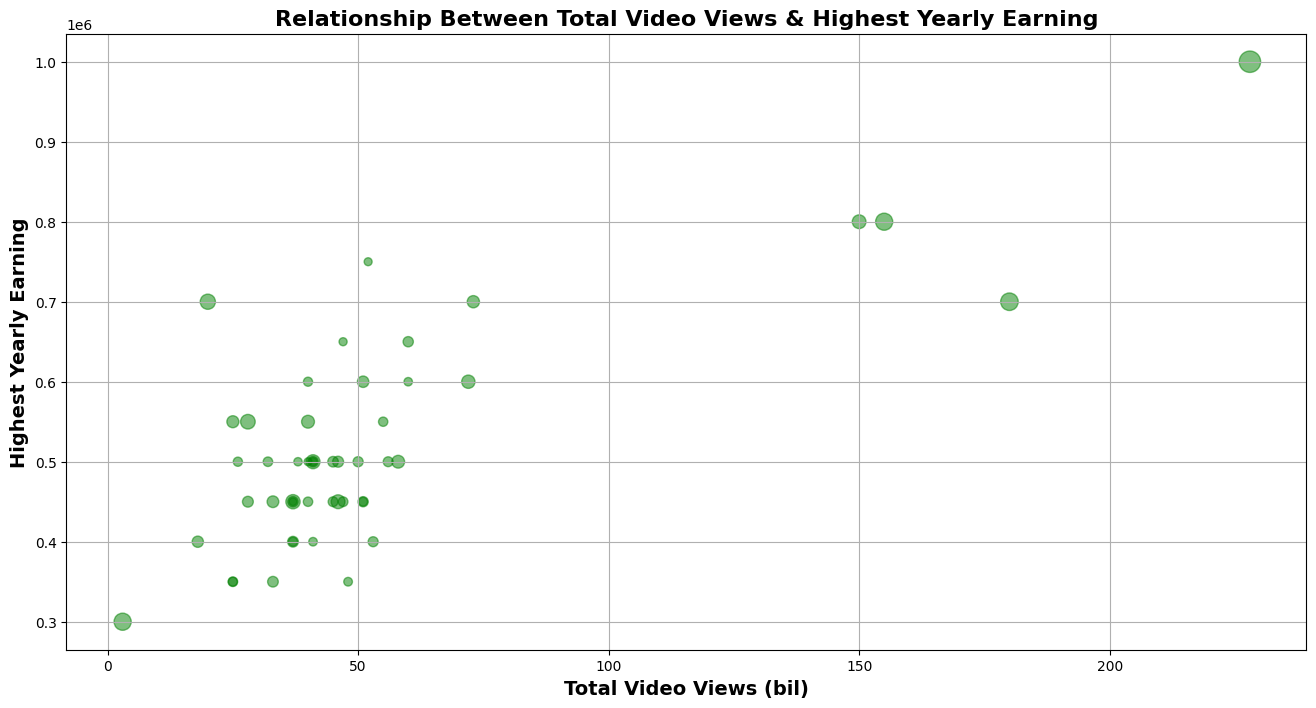

In [85]:
plt.figure(figsize=(16, 8))

# Scatter plot with bubble sizes and color
plt.scatter(merged_data['video_views'] / 1_000_000_000, merged_data['highest_monthly_earnings'],
            s=merged_data['subscribers'] / 1_000_000, alpha=0.5, color='green')

# Set the labels and title
plt.title('Relationship Between Total Video Views & Highest Yearly Earning', weight='bold', fontsize=16)
plt.xlabel('Total Video Views (bil)', weight='bold', fontsize=14)
plt.ylabel('Highest Yearly Earning', weight='bold', fontsize=14)

# Show the grid and plot
plt.grid(True)
plt.show()


# Scatter Plot: Relationship Between Total Video Views and Highest Yearly Earning
Insight: The plot shows a general trend where higher video views correlate with higher earnings, but the relationship is scattered. 
Some channels with fewer views still achieve high earnings, likely due to factors such as niche content, audience loyalty, or effective monetization 
strategies.

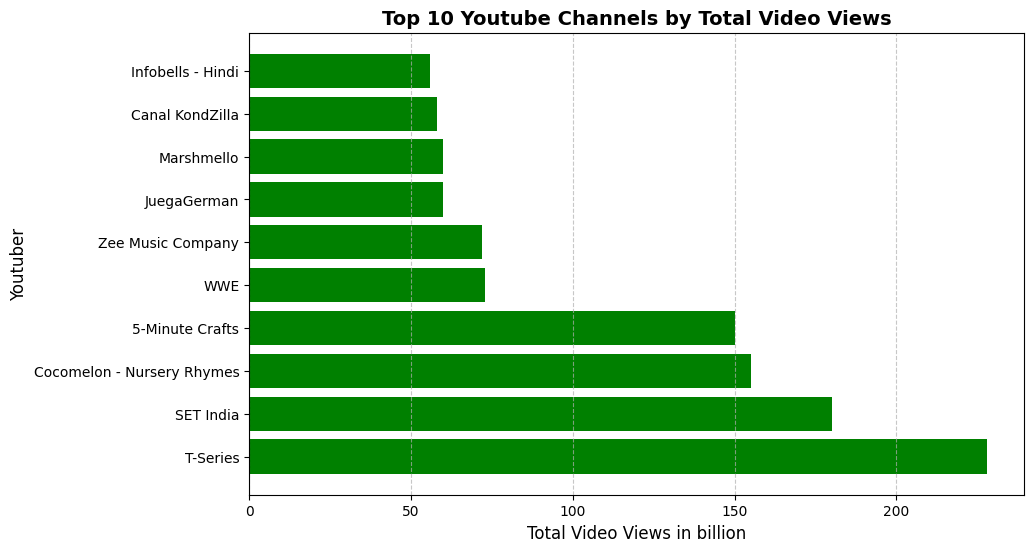

In [87]:
# Sort the DataFrame by video_views in descending order and select the top 10
top_10 = merged_data.sort_values(by='video_views', ascending=False).head(10)

# Extract the YouTuber names and video views for the top 10 channels
youtubers = top_10['Youtuber']
video_views = top_10['video_views'] / 1_000_000_000  # Convert video views to billions

plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.barh(youtubers, video_views, color='green')

# Add labels and title
plt.xlabel('Total Video Views in billion', fontsize=12)
plt.ylabel('Youtuber', fontsize=12)
plt.title('Top 10 Youtube Channels by Total Video Views', fontsize=14, weight='bold')

# Show the grid and plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


# Bar Chart: Top 10 YouTube Channels by Total Video Views
Insight: T-Series stands out as the most popular channel, with over 200 billion total video views. Other channels like SET India and Cocomelon - 
Nursery Rhymes follow at second and third places. This ranking highlights the dominance of Indian channels and children’s content in terms of video 
views.

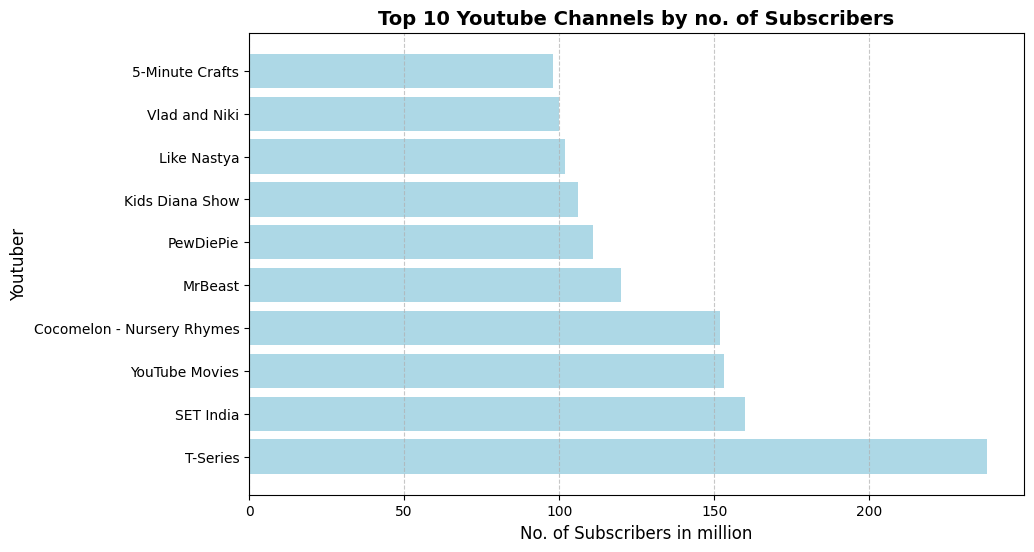

In [89]:

# Sort the DataFrame by subscribers in descending order and select the top 10
top_10_subscribers = merged_data.sort_values(by='subscribers', ascending=False).head(10)

# Extract the YouTuber names and subscriber count for the top 10 channels
youtubers = top_10_subscribers['Youtuber']
subscribers = top_10_subscribers['subscribers'] / 1_000_000  # Convert subscribers to millions

plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.barh(youtubers, subscribers, color='lightblue')

# Add labels and title
plt.xlabel('No. of Subscribers in million', fontsize=12)
plt.ylabel('Youtuber', fontsize=12)
plt.title('Top 10 Youtube Channels by no. of Subscribers', fontsize=14, weight='bold')

# Show the grid and plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


# Bar Chart: Top 10 YouTube Channels by Subscribers
Insight: T-Series also leads the ranking in terms of subscribers, with over 200 million. SET India and YouTube Movies come next. The chart shows a 
similar trend to video views, indicating that top channels often dominate in both subscribers and views.

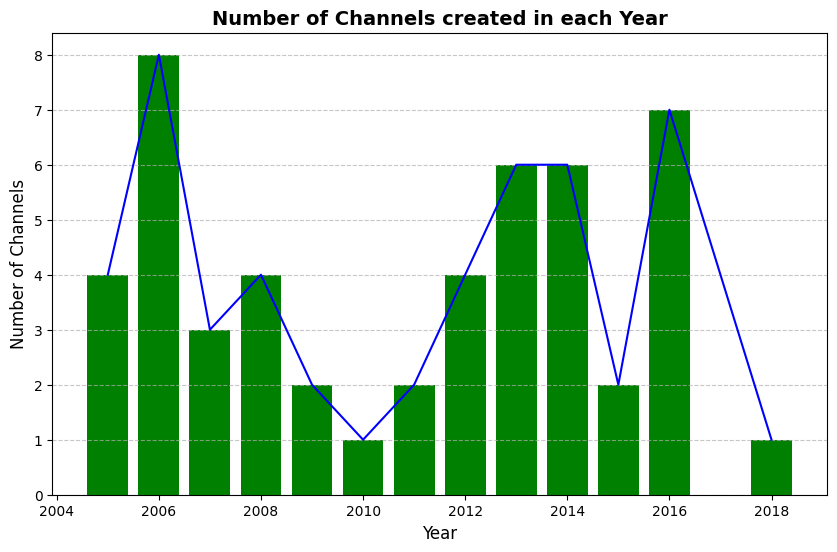

In [91]:
merged_data = pd.merge(YouTuberInfo_data, ChannelStatistics_data, on='youtuber_rank')

# Group by 'created_year' and count the number of channels created each year
channels_per_year = merged_data.groupby('created_year').size()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for the number of channels created each year
plt.bar(channels_per_year.index, channels_per_year.values, color='green')

# Line plot over the same bar plot
plt.plot(channels_per_year.index, channels_per_year.values, color='blue')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Channels', fontsize=12)
plt.title('Number of Channels created in each Year', fontsize=14, weight='bold')

# Show the grid and plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


# Bar Plot: Number of Channels Created Per Year
Insight: The bar chart shows that 2006 saw the highest number of YouTube channels created, followed by 2016 and 2007. This reflects periods of rapid 
growth on the platform. The dip in 2010 and 2018 might indicate market saturation or shifts in content creation trends.

# Conclusion
This analysis highlights the critical factors driving YouTube channel success. By understanding correlations between metrics such as subscribers, video views, and uploads, the project provides insights that content creators can use to enhance their performance. The use of data-driven strategies is essential for optimizing video content and engaging with a larger audience.


# Based on the data analysis in your document, here are some future recommendations for optimizing YouTube performance:

1. Content Strategy:
   - Focus on Music and Entertainment channels, as they dominate the platform (42% Music, 12% Entertainment).
   - Explore Kids’ content, which represents 18% of channels and has a significant audience.

2. Subscriber Engagement:
   - Aim to increase subscribers, as there is a moderate positive correlation between subscribers and video views. Channels with more subscribers generally achieve more video views.

3. Uploads:
   - Increase video uploads strategically, although uploads have a weaker correlation with subscribers and video views. Ensure the content is high-quality and relevant to your audience.

4. Monetization:
   - Pay attention to channels that generate consistent monthly earnings between $300,000 and $400,000, as these ranges dominate the earnings distribution.
   - Explore monetization strategies, focusing on maximizing video views, as higher views are linked to higher earnings.

5. Yearly Trends:
   - Consider the number of channels created each year. Peak years for YouTube channel creation (e.g., 2006 and 2016) show increased competition, so focus on newer trends to stand out.

